#Lede Program
#Data and databases 2015
#Session 07
#Number munging:  vectors, Pandas, probabilities

In [5]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)




Get our big data file from my webpage. You can use `http` in your browser or `wget` or whatever. You'll need to uncompress it.

!wget http://www.columbia.edu/~mj340/HMXPC_13.zip    #etc. whatever

In [6]:
#check contents of directory!



#Our ritual: Exploratory data analysis


> Exploratory data analysis (EDA) seeks to reveal structure, or simple descriptions, in data. We look at numbers and graphs and try to find patterns.  
    - Persi Diaconis, "Theories of Data Analysis: From Magical Thinking Through Classical statistics"

> . . . proceeding via a ‘dustbowl’ empiricism is dangerous at worst and foolish at best . . . . The purely empirical approach is particularly dangerous in an age when computers and packaged programs are readily available, since there is temptation to substitute immediate empirical analysis for more analytic thought and theory building.
    - Einhorn, “Alchemy in the Behavioral Sciences,” 1972

>. . . we can view the techniques of EDA as a ritual designed to reveal patters in a data set. Thus, we may believe that naturally occurring data sets contain structure, that EDA is a useful vehicle for revealing the structure. . . . If we make no attempt to check whether the structure could have arisen by chance, and tend to accept the findinds as gospel, then the ritual comes close to magical thinking. ... a controlled form of magical thinking--in the guise of 'working hypothesis'--is a basic ingredient of scientific progress. 
    - Persi Diaconis, "Theories of Data Analysis: From Magical Thinking Through Classical statistics"

#From data to databases to data mining
- move from accessing and manipulating data to performing ever more complicated *queries* on our data


#`Pandas` first-line `python` tool for EDA
- rich data structures
- powerful ways to slice, dice, reformate, fix, and eliminate data
    - taste of what can do
- tables like Excel or a spreadsheet
- rich queries like databases
- manipulation on vectors and matrices directly


#`Pandas`: charismatic megafauna

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("HMXPC_13.csv", sep=",")

In [9]:
df.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9,NaN,NaN,0,NaN,1
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9,NaN,1,0,NaN,1
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16,NaN,NaN,0,NaN,1
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16,NaN,NaN,0,NaN,1
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16,NaN,NaN,0,NaN,1


In [10]:
df.describe()

,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
count,641138,641138.000000,641138.000000,641138.000000,544533.000000,441987.000000,478395.000000,183608.000000,382385.000000,641138.000000,0,100161
mean,1,0.624299,0.061899,0.027587,1985.253279,431.008018,5.710254,114.844173,3.634423,0.018968,NaN,1
std,0,0.484304,0.240973,0.163786,8.891814,1516.116057,11.866471,426.996844,4.490987,0.229539,NaN,0
min,1,0.000000,0.000000,0.000000,1931.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,1
25%,1,0.000000,0.000000,0.000000,1982.000000,3.000000,1.000000,5.000000,1.000000,0.000000,NaN,1
50%,1,1.000000,0.000000,0.000000,1988.000000,24.000000,2.000000,18.000000,2.000000,0.000000,NaN,1
75%,1,1.000000,0.000000,0.000000,1991.000000,158.000000,4.000000,73.000000,4.000000,0.000000,NaN,1
max,1,1.000000,1.000000,1.000000,2013.000000,197757.000000,205.000000,98517.000000,48.000000,20.000000,NaN,1


In [11]:
df.shape

(641138, 20)

In [12]:
df["course_id"]

0      HarvardX/CB22x/2013_Spring
1             HarvardX/CS50x/2012
2      HarvardX/CB22x/2013_Spring
3             HarvardX/CS50x/2012
4      HarvardX/ER22x/2013_Spring
5       HarvardX/PH207x/2012_Fall
6     HarvardX/PH278x/2013_Spring
7      HarvardX/CB22x/2013_Spring
8      HarvardX/CB22x/2013_Spring
9             HarvardX/CS50x/2012
10     HarvardX/ER22x/2013_Spring
11     HarvardX/ER22x/2013_Spring
12     HarvardX/CB22x/2013_Spring
13            HarvardX/CS50x/2012
14     HarvardX/ER22x/2013_Spring
...
641123     MITx/6.00x/2013_Spring
641124     MITx/6.00x/2013_Spring
641125    MITx/6.002x/2013_Spring
641126     MITx/6.00x/2013_Spring
641127    MITx/6.002x/2013_Spring
641128    MITx/14.73x/2013_Spring
641129     MITx/6.00x/2013_Spring
641130    MITx/14.73x/2013_Spring
641131     MITx/8.02x/2013_Spring
641132    MITx/6.002x/2013_Spring
641133     MITx/6.00x/2013_Spring
641134     MITx/6.00x/2013_Spring
641135    MITx/6.002x/2013_Spring
641136     MITx/6.00x/2013_Spring
641137    

In [13]:
df["course_id"][3000:3005]

3000            HarvardX/CS50x/2012
3001      HarvardX/PH207x/2012_Fall
3002    HarvardX/PH278x/2013_Spring
3003            HarvardX/CS50x/2012
3004            HarvardX/CS50x/2012
Name: course_id, dtype: object

In [14]:
df[3000:3005]

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
3000,HarvardX/CS50x/2012,MHxPC130344411,1,0,0,0,United States,NaN,NaN,NaN,0,2012-08-16,NaN,NaN,12,NaN,NaN,0,NaN,1
3001,HarvardX/PH207x/2012_Fall,MHxPC130344411,1,1,0,0,United States,NaN,NaN,NaN,0,2012-08-16,2013-03-21,239,12,100,4,0,NaN,NaN
3002,HarvardX/PH278x/2013_Spring,MHxPC130344411,1,0,0,0,United States,NaN,NaN,NaN,0,2013-03-21,NaN,NaN,12,NaN,NaN,0,NaN,1
3003,HarvardX/CS50x/2012,MHxPC130210735,1,0,0,0,Pakistan,NaN,NaN,NaN,0.0,2012-09-13,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3004,HarvardX/CS50x/2012,MHxPC130411842,1,1,0,0,Unknown/Other,NaN,NaN,NaN,0,2012-08-16,NaN,NaN,NaN,NaN,1,0,NaN,1


In [15]:
df.ix[666]

course_id            HarvardX/CS50x/2012
userid_DI                 MHxPC130297337
registered                             1
viewed                                 0
explored                               0
certified                              0
final_cc_cname_DI         United Kingdom
LoE_DI                               NaN
YoB                                  NaN
gender                               NaN
grade                                  0
start_time_DI                 2012-08-17
last_event_DI                        NaN
nevents                              NaN
ndays_act                            NaN
nplay_video                          NaN
nchapters                            NaN
nforum_posts                           0
roles                                NaN
incomplete_flag                      NaN
Name: 666, dtype: object

In [16]:
df.dtypes

course_id             object
userid_DI             object
registered             int64
viewed                 int64
explored               int64
certified              int64
final_cc_cname_DI     object
LoE_DI                object
YoB                  float64
gender                object
grade                 object
start_time_DI         object
last_event_DI         object
nevents              float64
ndays_act            float64
nplay_video          float64
nchapters            float64
nforum_posts           int64
roles                float64
incomplete_flag      float64
dtype: object

In [17]:
SELECT * FROM df WHERE final_cc_cname_DI = 'United States'

SyntaxError: invalid syntax (<ipython-input-17-3abc234d30db>, line 1)

In [ ]:
df["final_cc_cname_DI"] == "United States"

In [ ]:
df_US = df[df["final_cc_cname_DI"] == "United States"]

df_US

In [30]:
df_ger = df[df["final_cc_cname_DI"] == "Germany"]

df_ger

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
125,HarvardX/ER22x/2013_Spring,MHxPC130440641,1,1,0,0,Germany,NaN,NaN,NaN,0,2013-05-01,2013-05-24,162,8,NaN,5,0,NaN,NaN
156,HarvardX/CB22x/2013_Spring,MHxPC130074234,1,1,0,0,Germany,NaN,NaN,NaN,NaN,2012-12-21,2013-04-01,177,7,NaN,5,0,NaN,NaN
157,HarvardX/CS50x/2012,MHxPC130074234,1,1,1,0,Germany,NaN,NaN,NaN,0,2012-10-13,2013-04-02,9,1,NaN,12,0,NaN,NaN
167,HarvardX/CS50x/2012,MHxPC130375656,1,1,1,0,Germany,NaN,NaN,NaN,0,2013-01-18,NaN,NaN,1,NaN,7,0,NaN,1
168,HarvardX/ER22x/2013_Spring,MHxPC130375656,1,1,0,0,Germany,NaN,NaN,NaN,0,2013-04-01,2013-04-01,71,1,NaN,4,0,NaN,NaN
232,HarvardX/ER22x/2013_Spring,MHxPC130010806,1,0,0,0,Germany,NaN,NaN,NaN,0,2013-01-23,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
245,HarvardX/CS50x/2012,MHxPC130407597,1,0,0,0,Germany,NaN,NaN,NaN,0.0,2012-12-21,NaN,NaN,1,NaN,NaN,0,NaN,1
246,HarvardX/ER22x/2013_Spring,MHxPC130407597,1,0,0,0,Germany,NaN,NaN,NaN,NaN,2013-03-05,2013-03-05,1,1,NaN,NaN,0,NaN,NaN
269,HarvardX/CS50x/2012,MHxPC130051714,1,0,0,0,Germany,NaN,NaN,NaN,0,2012-08-16,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
297,HarvardX/CS50x/2012,MHxPC130472126,1,1,0,0,Germany,NaN,NaN,NaN,0.0,2013-08-16,NaN,NaN,NaN,NaN,7,0,NaN,1


# PYTHON SQL-ish

In [31]:
df[(df["final_cc_cname_DI"]=="France") & (df["gender"]=="m")]

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
19470,HarvardX/CS50x/2012,MHxPC130124224,1,1,0,0,France,Secondary,1991,m,0,2012-07-24,NaN,NaN,NaN,NaN,1,0,NaN,1
19513,HarvardX/CS50x/2012,MHxPC130570016,1,1,0,0,France,Master's,1985,m,0,2012-07-24,NaN,NaN,6,NaN,1,0,NaN,1
19514,HarvardX/ER22x/2013_Spring,MHxPC130570016,1,1,0,0,France,Master's,1985,m,0,2012-12-21,2013-06-25,47,6,NaN,6,0,NaN,NaN
19621,HarvardX/CS50x/2012,MHxPC130155225,1,1,0,0,France,Master's,1989,m,0,2012-07-24,NaN,NaN,NaN,NaN,1,0,NaN,1
19856,HarvardX/CS50x/2012,MHxPC130497834,1,1,0,0,France,NaN,NaN,m,0,2012-07-24,2013-06-13,6,2,NaN,4,0,NaN,NaN
20272,HarvardX/CS50x/2012,MHxPC130066193,1,1,1,0,France,Master's,1988,m,0,2012-10-18,2013-02-20,1,1,NaN,12,0,NaN,NaN
21675,HarvardX/CS50x/2012,MHxPC130417934,1,1,0,0,France,Bachelor's,1992,m,0,2012-07-24,2013-03-12,25,3,NaN,4,0,NaN,NaN
21676,HarvardX/PH278x/2013_Spring,MHxPC130417934,1,0,0,0,France,Bachelor's,1992,m,0,2013-02-17,2013-04-17,3,3,NaN,NaN,0,NaN,NaN
21690,HarvardX/ER22x/2013_Spring,MHxPC130092972,1,1,0,0,France,Master's,1981,m,0,2013-07-10,2013-07-19,133,3,NaN,4,0,NaN,NaN
22861,HarvardX/CS50x/2012,MHxPC130345077,1,0,0,0,France,Bachelor's,1989,m,0,2012-07-25,NaN,NaN,1,NaN,NaN,0,NaN,1


In [32]:
french_students = df[df['final_cc_cname_DI']=='France']
male_french_students= [french_students['gender']=='m']

male_french_students

[7       False
 256     False
 423     False
 449     False
 730     False
 807     False
 928     False
 1078    False
 1079    False
 1171    False
 1236    False
 1237    False
 1238    False
 1239    False
 1394    False
 ...
 639317    False
 639722     True
 639723     True
 639807     True
 640128    False
 640208     True
 640249     True
 640463     True
 640487    False
 640506     True
 640579     True
 640646     True
 640655     True
 640898    False
 640935     True
 Name: gender, Length: 4700, dtype: bool]

In [21]:
df['nplay_video']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5     50
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
...
641123   NaN
641124   NaN
641125   NaN
641126    77
641127   NaN
641128     1
641129   NaN
641130   NaN
641131   NaN
641132   NaN
641133     4
641134   NaN
641135   NaN
641136    14
641137   NaN
Name: nplay_video, Length: 641138, dtype: float64

In [33]:
df['gender']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
...
641123    m
641124    m
641125    m
641126    m
641127    m
641128    m
641129    m
641130    f
641131    m
641132    m
641133    m
641134    f
641135    m
641136    m
641137    m
Name: gender, Length: 641138, dtype: object

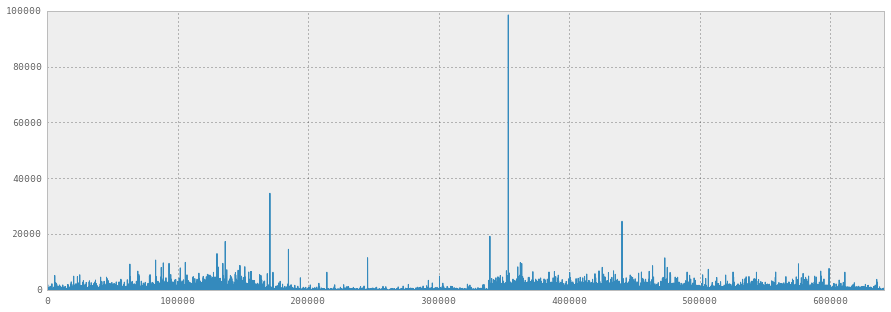

In [34]:
df['nplay_video'].dropna().plot()

In [35]:
df[df['nplay_video']>80000]

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
353229,MITx/6.00x/2012_Fall,MHxPC130155963,1,1,0,0,Other South America,NaN,NaN,NaN,0,2012-08-31,2012-12-19,197757,19,98517,5,0,NaN,NaN


In [36]:
country=df['final_cc_cname_DI'].value_counts()

In [37]:
country

United States                             184240
India                                      88696
Unknown/Other                              82029
Other Europe                               40377
Other Africa                               23897
United Kingdom                             22131
Brazil                                     17856
Other Middle East/Central Asia             17325
Other South Asia                           12992
Canada                                     12738
Pakistan                                   10824
Russian Federation                         10432
Spain                                      10003
Other South America                         9916
Egypt                                       9286
Germany                                     8074
Nigeria                                     7483
Other East Asia                             6446
Australia                                   6419
Mexico                                      5638
Philippines         

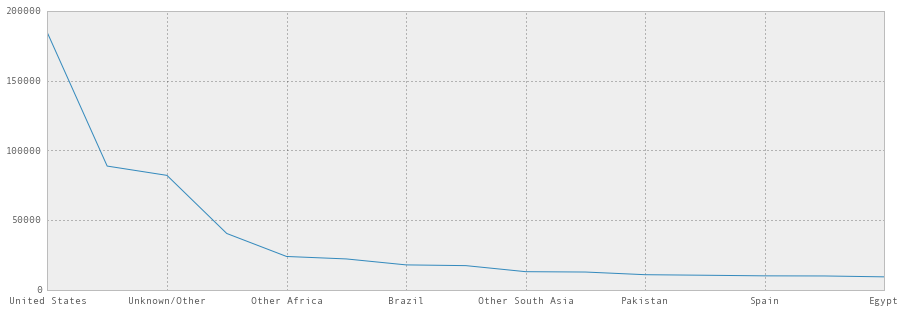

In [38]:
country[:15].plot()

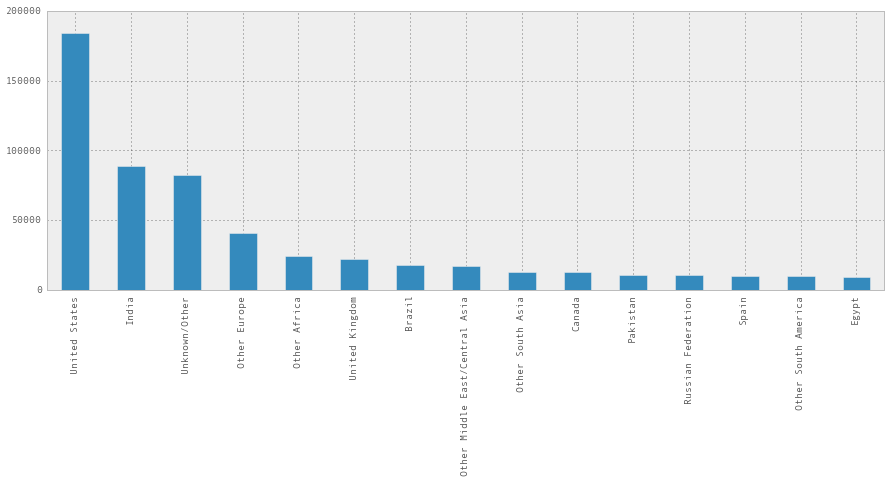

In [40]:
country[:15].plot(kind='bar')

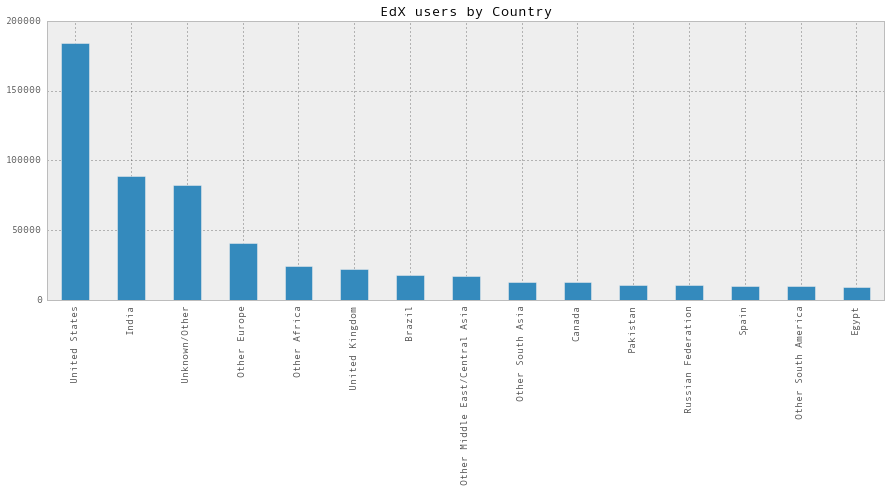

In [41]:
country[:15].plot(kind='bar', title='EdX users by Country')

In [42]:
df['nplay_video'].max()

98517.0

In [43]:
df['nplay_video'].mean()

114.84417345649427

In [44]:
df.groupby(by='final_cc_cname_DI').mean()

,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
final_cc_cname_DI,,,,,,,,,,,,
Australia,1,0.607571,0.069014,0.030534,1985.693782,371.598265,5.302119,105.875403,3.753662,0.000000,NaN,1
Bangladesh,1,0.594280,0.044940,0.010685,1989.283909,194.713975,3.683994,50.232198,3.120117,0.001571,NaN,1
Brazil,1,0.650930,0.054603,0.025370,1987.120924,353.124753,5.116004,100.978549,3.604155,0.006776,NaN,1
Canada,1,0.657089,0.068614,0.026142,1986.211599,400.234292,5.514391,102.305122,3.667121,0.006437,NaN,1
China,1,0.656673,0.034043,0.011992,1988.642622,144.857237,3.325476,64.258065,2.904186,0.000000,NaN,1
Colombia,1,0.694358,0.087029,0.042057,1988.329209,679.117501,7.222738,159.326077,4.066521,0.019571,NaN,1
Egypt,1,0.567198,0.044583,0.012923,1989.417962,261.210069,4.218016,118.119413,3.154602,0.001077,NaN,1
France,1,0.700426,0.092766,0.043404,1986.254956,448.560610,5.924709,129.737427,4.221837,0.000000,NaN,1
Germany,1,0.723557,0.101932,0.057221,1985.702353,573.852445,6.848969,128.940660,4.656916,0.003220,NaN,1


In [52]:
df.groupby(by="final_cc_cname_DI")["nplay_video","certified"].mean()

,nplay_video,certified
final_cc_cname_DI,,
Australia,105.875403,0.030534
Bangladesh,50.232198,0.010685
Brazil,100.978549,0.025370
Canada,102.305122,0.026142
China,64.258065,0.011992
Colombia,159.326077,0.042057
Egypt,118.119413,0.012923
France,129.737427,0.043404
Germany,128.940660,0.057221


In [53]:
df.groupby(by=["final_cc_cname_DI",'gender']).mean()

registered    viewed  explored  \
final_cc_cname_DI                      gender                                   
Australia                              f                1  0.577156  0.071861   
                                       m                1  0.606525  0.066485   
Bangladesh                             f                1  0.573770  0.065574   
                                       m                1  0.584305  0.041570   
Brazil                                 f                1  0.577759  0.036128   
                                       m                1  0.666721  0.054699   
Canada                                 f                1  0.598749  0.058591   
                                       m                1  0.678538  0.066486   
China                                  f                1  0.592292  0.030426   
                                       m                1  0.666910  0.033892   
Colombia                               f                1  0.623729  0.091525   
                                       m                1  0.708143  0.070906   
Egypt                                  f                1  0.535194  0.041869   
                                       m                1  0.565519  0.042667   
France                                 f                1  0.686141  0.107337   
                                       m                1  0.706518  0.085782   
Germany                                f                1  0.689729  0.106277   
                                       m                1  0.725611  0.098193   
Greece                                 f                1  0.679750  0.085324   
                                       m                1  0.732678  0.100187   
India                                  f                1  0.646058  0.086100   
                                       m                1  0.673045  0.076646   
Indonesia                              f                1  0.555046  0.083486   
                                       m                1  0.617453  0.056604   
Japan                                  f                1  0.665198  0.017621   
                                       m                1  0.727346  0.042071   
Mexico                                 f                1  0.625668  0.068182   
                                       m                1  0.703339  0.058292   
Morocco                                f                1  0.678392  0.050251   
                                       m                1  0.669079  0.032563   
...                                                   ...       ...       ...   
Other North & Central Amer., Caribbean f                1  0.595960  0.077441   
                                       m                1  0.716568  0.065750   
Other Oceania                          f                1  0.380952  0.023810   
                                       m                1  0.774834  0.072848   
Other South America                    f                1  0.606322  0.079023   
                                       m                1  0.696716  0.056300   
Other South Asia                       f                1  0.613455  0.065091   
                                       m                1  0.659847  0.062413   
Pakistan                               f                1  0.555957  0.046029   
                                       m                1  0.577361  0.039116   
Philippines                            f                1  0.562192  0.030109   
                                       m                1  0.649222  0.048360   
Poland                                 f                1  0.742900  0.088191   
                                       m                1  0.841947  0.145132   
Portugal                               f                1  0.571930  0.112281   
                                       m                1  0.716169  0.102012   
Russian Federation                     f                1  0.606507  0.065684 

In [54]:
#MATH IS FUN?!

In [58]:
toy_df=pd.DataFrame({'a': [10,20,30], 'b':[15,25,35]})
toy_df

,a,b
0,10,15
1,20,25
2,30,35


In [59]:
toy_df*10

,a,b
0,100,150
1,200,250
2,300,350


In [60]:
#ELEMENT WISE

In [61]:
toy_df.max()

a    30
b    35
dtype: int64

In [62]:
toy_df.max(axis=1)

0    15
1    25
2    35
dtype: int64

In [63]:
toy_df.max(axis=0)

a    30
b    35
dtype: int64

In [64]:
toy_df.mean(axis=1)

0    12.5
1    22.5
2    32.5
dtype: float64

In [65]:
df_text_toy=pd.DataFrame({'a':['fred','gene'],'b':['sam','eva']})

In [66]:
df_text_toy

,a,b
0,fred,sam
1,gene,eva


In [67]:
"hi"+df_text_toy

,a,b
0,hifred,hisam
1,higene,hieva
